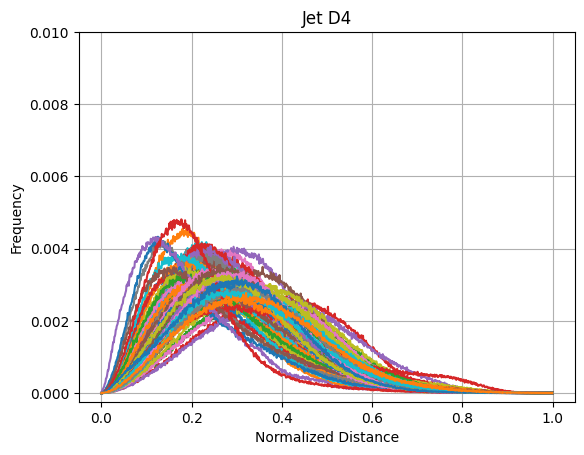

In [24]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data = []

for obj_file_path in glob.glob(os.path.join(r"../features/Jet/", '*')):
    data.append(np.load(obj_file_path, allow_pickle=True))


subplot = 111
for i in range(len(data)):
    feature = data[i][-1]
    plt.subplot(subplot)
    plt.plot(np.asarray(range(len(feature))) / len(feature), feature)

plt.xlabel('Normalized Distance')
plt.ylabel('Frequency')
plt.ylim(top=0.01)
plt.title('Jet D4')
plt.grid(True)

# Display the histogram
plt.show()

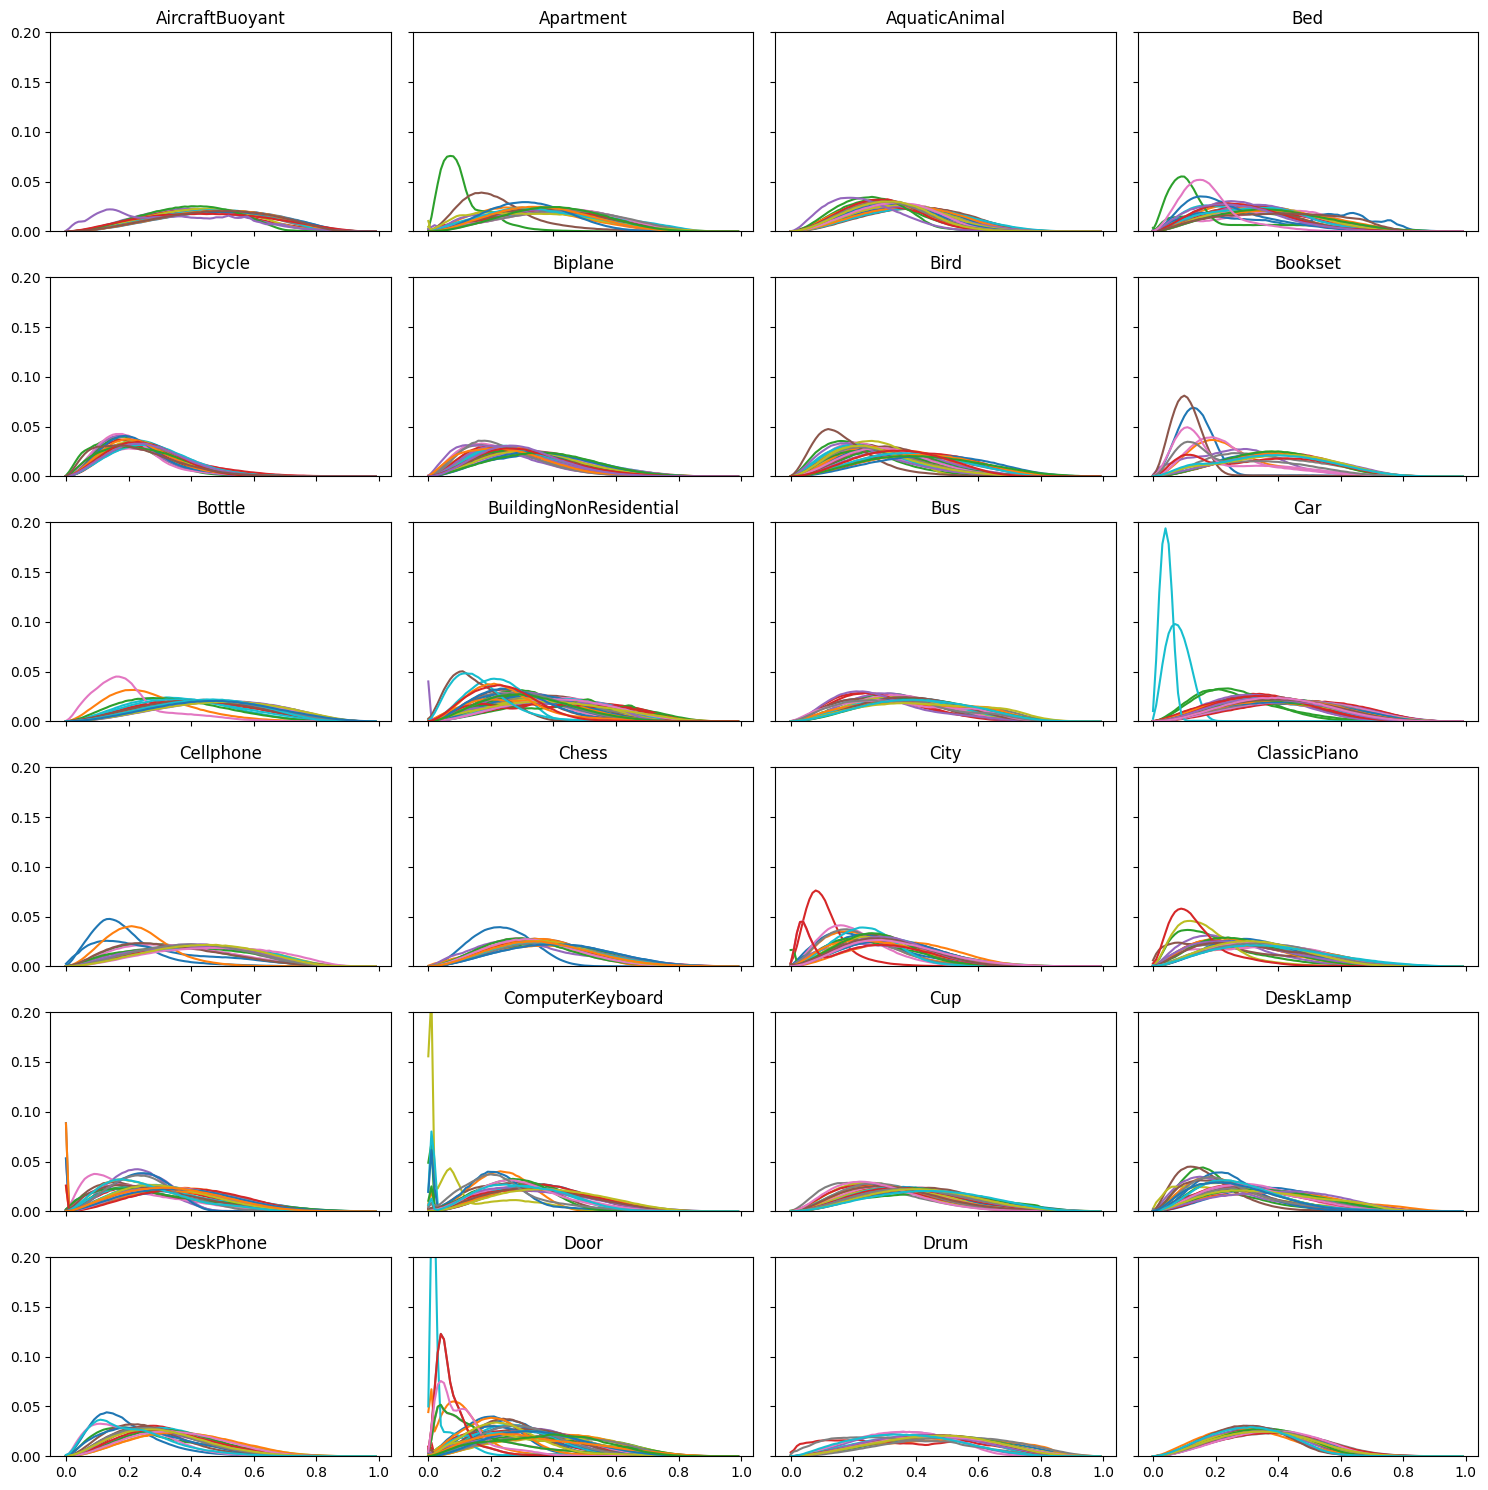

In [55]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt
import math

data = []

class_names = []

dbpath = r"../features/"
for class_folder in os.listdir(dbpath)[:24]:
    class_names.append(class_folder)
    class_folder_path = os.path.join(dbpath, class_folder)
    class_data = []
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        class_data.append(np.load(obj_file_path, allow_pickle=True))
    data.append(class_data)


fig, axs = plt.subplots(round(len(data) / 4), 4, sharex=True, sharey=True, figsize=(15,15))
plots = axs.flatten()
for c in range(len(data)):
    class_data = data[c]
    ax = plots[c]
    for i in range(len(class_data)):
        feature = class_data[i][-1]
        ax.plot(np.asarray(range(len(feature))) / len(feature), feature)
        ax.title.set_text(class_names[c])

plt.setp(axs, ylim=(0, 0.2))
fig.tight_layout()
# Display the histogram
plt.show()

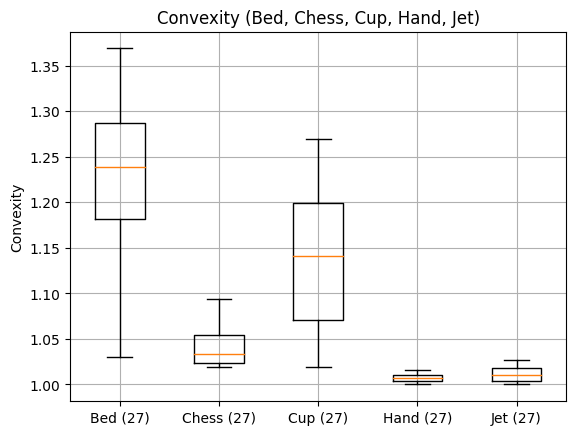

In [74]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data1 = []

for obj_file_path in glob.glob(os.path.join(r"../features/Bed", '*')):
    data1.append(np.load(obj_file_path, allow_pickle=True))

data2 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Jet", '*')):
    data2.append(np.load(obj_file_path, allow_pickle=True))

data3 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Cup", '*')):
    data3.append(np.load(obj_file_path, allow_pickle=True))

data4 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Hand", '*')):
    data4.append(np.load(obj_file_path, allow_pickle=True))

data5 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Chess", '*')):
    data5.append(np.load(obj_file_path, allow_pickle=True))

plot1 = []
plot2 = []
plot3 = []
plot4 = []
plot5 = []

index = 4

for i in range(len(data1)):
    try:
        plot1.append(abs(data1[i][index]))
    except:
        pass
    try:
        plot5.append(abs(data2[i][index]))
    except:
        pass
    try:
        plot2.append(abs(data5[i][index]))
    except:
        pass
    try:
        plot4.append(abs(data4[i][index]))
    except:
        pass
    try:
        plot3.append(abs(data3[i][index]))
    except:
        pass

plt.boxplot([plot1, plot2, plot3, plot4, plot5], [], showfliers=False)
labels = ("Bed ({})".format(len(plot1)), "Chess ({})".format(len(plot2)), "Cup ({})".format(len(plot3)), "Hand ({})".format(len(plot4)), "Jet ({})".format(len(plot5)))
plt.xticks(np.arange(len(labels))+1,labels)

plt.ylabel('Convexity')
plt.title('Convexity (Bed, Chess, Cup, Hand, Jet)')
plt.grid(True)

# Display the histogram
plt.show()

In [32]:

def unique_random_index(n, x, y):
    cols = []
    while len(cols) < y:
        a,b,c = np.random.randint(0, n, size=x)
        if a != b and  b != c and c != a:
            cols.append([a,b,c])
    return np.asarray(cols)

unique_random_index(7000, x=3, y=1000000) 

array([[5598, 5144, 4262],
       [3274,  894, 5831],
       [4939, 5124,  380],
       ...,
       [4016, 6581, 3396],
       [5222,  298, 6202],
       [4903, 1304, 1265]])

In [40]:
def give_random_triplets(n, m, input):
    return np.random.choice(input, size=(n, m), replace=True)

def unique_random_index(n, m, input):
    random_triplets = give_random_triplets(n, m, input)
    equal_indices = np.where((random_triplets[:, 0] == random_triplets[:, 1]) | (random_triplets[:, 1] == random_triplets[:, 2]) | (random_triplets[:, 0] == random_triplets[:, 2]))
    while equal_indices[0].size > 0:
        random_triplets[equal_indices] = give_random_triplets(random_triplets[equal_indices].shape[0], m, range(7000))
        equal_indices = np.where((random_triplets[:, 0] == random_triplets[:, 1]) | (random_triplets[:, 1] == random_triplets[:, 2]) | (random_triplets[:, 0] == random_triplets[:, 2]))
    return random_triplets

unique_random_index(1000000, 3, range(7000))

array([[2489,  975, 6289],
       [4980, 6818, 1648],
       [6241, 2988, 6047],
       ...,
       [6351, 4256, 2394],
       [6041,  733, 4192],
       [4155, 3829, 5776]])

In [18]:
import numpy as np 


a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27, 45, 67, 43.54, 50])

my_bins = np.arange(start=0, step=max(a) / 100, stop=max(a))

hist,bins = np.histogram(a,bins=my_bins)

print(len(bins))
print(hist / sum(hist))


100
[0.         0.         0.         0.         0.         0.11111111
 0.         0.         0.         0.         0.         0.
 0.05555556 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05555556 0.
 0.         0.05555556 0.         0.         0.         0.
 0.         0.05555556 0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05555556 0.05555556 0.05555556 0.         0.
 0.         0.         0.         0.05555556 0.05555556 0.
 0.         0.         0.05555556 0.05555556 0.05555556 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.
 0.05555556 0.         0.         0.         0.         0.
 0.         0.      

In [59]:
import math

data = []
dbpath = r"../features/"
for class_folder in os.listdir(dbpath):
    class_names.append(class_folder)
    class_folder_path = os.path.join(dbpath, class_folder)
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        data.append(np.load(obj_file_path, allow_pickle=True))

print(len(data))

for d in data:
    hists = d[7:]
    for i in range(len(hists)):
        h = hists[i]
        if not (len(h) == 100 and abs(sum(h) - 1) < 0.000000000000001):
            print("Invalid {}".format(i), len(h), sum(h))


2475
Invalid 0 100 1.000000000000001
Invalid 3 100 1.000000000000001
Invalid 2 100 0.9999999999999989
Invalid 1 100 0.9999999999999988
Invalid 1 100 0.9999999999999988


In [53]:
dbpath = r"../resampledPML/"
count = 0
for class_folder in os.listdir(dbpath):
    class_folder_path = os.path.join(dbpath, class_folder)
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        count += 1

print(count)

2544


In [70]:
import numpy as np

scalar_weight = 1 / 12
weights = np.append(np.full(shape=7, fill_value=(scalar_weight)), np.full(shape=500, fill_value=(scalar_weight / 100)))
weights

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083